**Пункт 1**

Содержание задачи исследования

Целью исследования является построение регрессионной модели для анализа того, как экономические факторы, включая стоимость коммунальных услуг, жилья, основных продуктов питания, а также инфляцию, влияют на покупательскую способность населения в российских регионах.

Покупательская способность в этом контексте определяется количеством килограммов говядины, которое может позволить себе среднестатистический житель региона в месяц. Это количество отражает реальную доступность ресурсов для населения и напрямую зависит от цен на основные товары и услуги.

Данные и обоснование выбора переменных

Для анализа используется пространственная выборка, включающая данные по различным регионам России. В качестве зависимой переменной выбрано количество килограммов говядины, которое может позволить себе житель региона (покупательная способность). Это непрерывная переменная, что соответствует требованиям задачи.

Объясняющие переменные включают:

Стоимость коммунальных услуг:
Плата за газ (рублей на человека в месяц).
Плата за водоснабжение и канализацию.
Расходы на жилье: стоимость аренды или коммунальной платы за жилье в государственных и муниципальных фондах.
Цены на базовые продукты питания: например, цены на подсолнечное масло и рыбу, которые влияют на распределение доходов.
Инфляционный индекс для услуг: измеряет процентное изменение цен на услуги, что позволяет отразить инфляционное давление на покупательную способность.
Данные соответствуют требованиям задачи:

Обоснование выбора переменных
Выбор этих переменных обоснован их значимостью для анализа экономического поведения населения. Рост цен на жилье, коммунальные услуги и продукты питания снижает покупательную способность, так как оставляет меньше средств для покупки других товаров, таких как говядина.

**Пункт 2**

Descriptive Statistics:
        Purchasing Power (Beef)  Sunflower Oil Price  Frozen Fish Price  \
count                81.000000            81.000000          81.000000   
mean                 89.510741           308.850741         164.511111   
std                  37.751627           107.598937          61.130864   
min                  50.940000           150.110000          92.120000   
25%                  72.360000           250.950000         129.410000   
50%                  80.860000           278.060000         148.020000   
75%                  96.560000           332.630000         179.090000   
max                 339.390000           833.550000         411.150000   

        Gas Price  Water & Sewer Price  Housing Price  
count   81.000000            81.000000      81.000000  
mean   114.589753           113.387531     112.802963  
std      3.841477             4.969188       6.190635  
min    104.530000            99.090000      94.610000  
25%    112.530000           

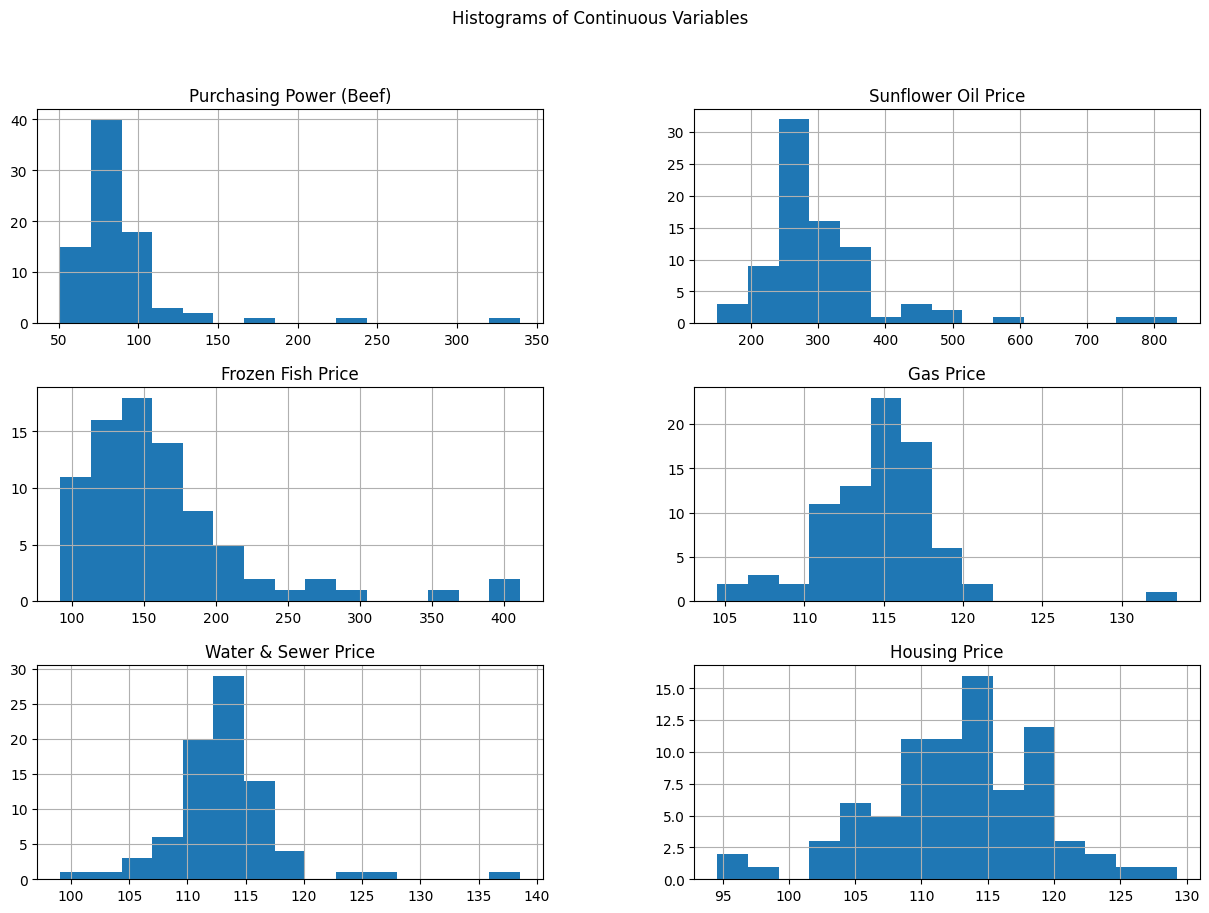

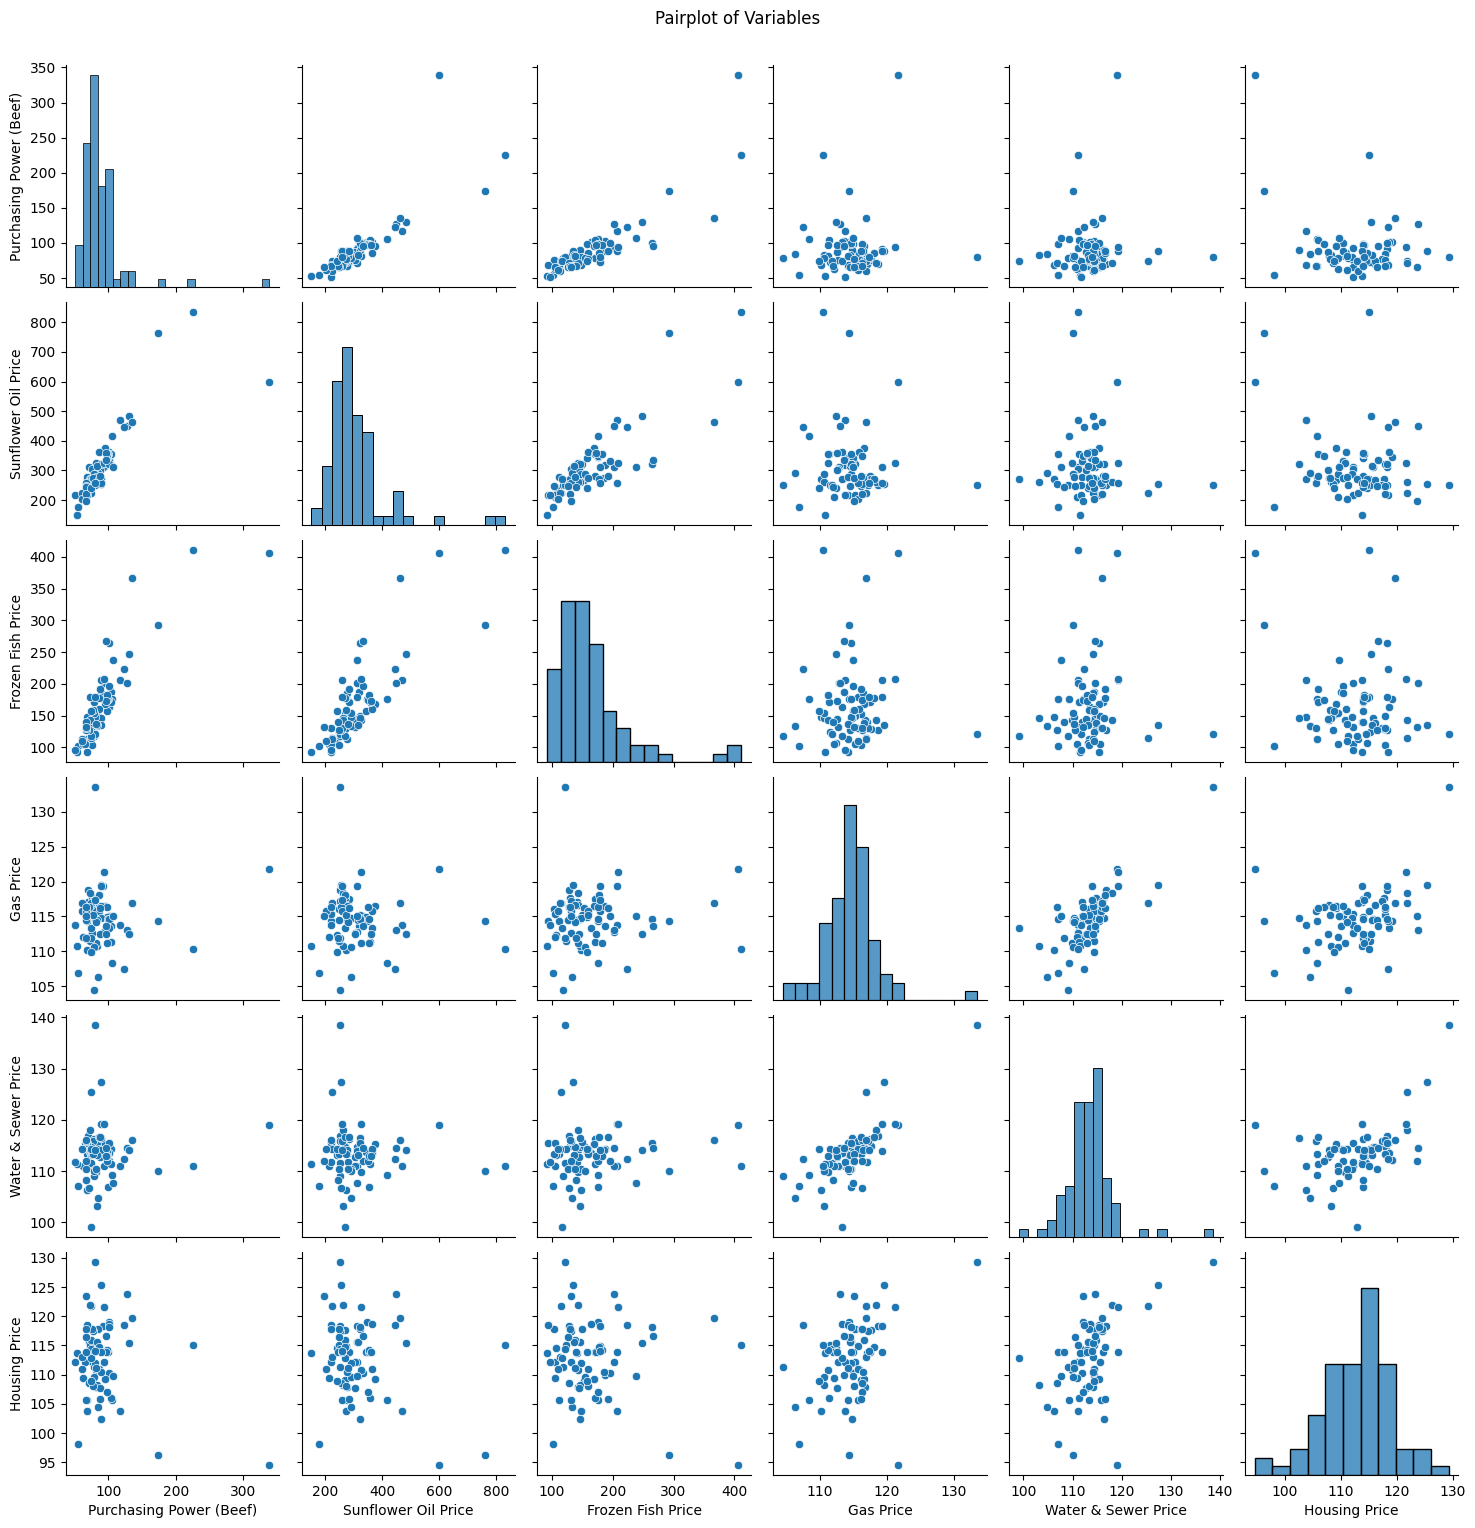

Correlation Matrix:
                          Purchasing Power (Beef)  Sunflower Oil Price  \
Purchasing Power (Beef)                 1.000000             0.834247   
Sunflower Oil Price                     0.834247             1.000000   
Frozen Fish Price                       0.856808             0.828815   
Gas Price                               0.087675            -0.070578   
Water & Sewer Price                     0.074987            -0.059512   
Housing Price                          -0.265490            -0.226061   

                         Frozen Fish Price  Gas Price  Water & Sewer Price  \
Purchasing Power (Beef)           0.856808   0.087675             0.074987   
Sunflower Oil Price               0.828815  -0.070578            -0.059512   
Frozen Fish Price                 1.000000   0.073140             0.048661   
Gas Price                         0.073140   1.000000             0.737599   
Water & Sewer Price               0.048661   0.737599             1.000000   

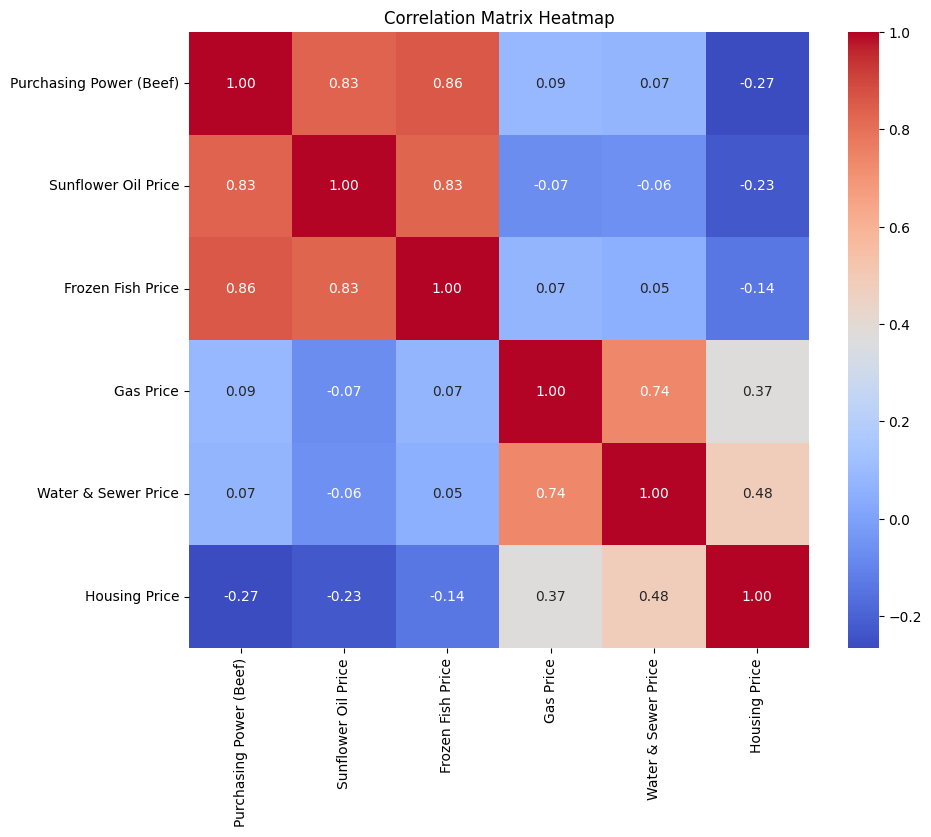

VIF Data:
               Variable          VIF
0  Sunflower Oil Price    29.353979
1    Frozen Fish Price    26.957711
2            Gas Price  1255.091450
3  Water & Sewer Price  1293.821618
4        Housing Price   425.318052


In [10]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Загрузка и подготовка данных
file_path = 'Книга1.xlsx'
data = pd.read_excel(file_path)
data = data.rename(columns={
    'Говядина (кроме бескостного мяса)': 'Purchasing Power (Beef)',
    'Масло подсолнечное': 'Sunflower Oil Price',
    'Рыба мороженая разделанная (кроме лососевых пород)': 'Frozen Fish Price',
    'Газ сетевой, месяц с человека': 'Gas Price',
    'Водоснабжение холодное и водоотведение': 'Water & Sewer Price',
    'Плата за жилье в домах государственного и муниципального жилищных фондов': 'Housing Price'
})
data_analysis = data[['Purchasing Power (Beef)', 'Sunflower Oil Price', 'Frozen Fish Price',
                      'Gas Price', 'Water & Sewer Price', 'Housing Price']].dropna()
data_analysis['Gas Price'] = pd.to_numeric(data_analysis['Gas Price'], errors='coerce')
data_analysis['Housing Price'] = pd.to_numeric(data_analysis['Housing Price'], errors='coerce')
data_analysis = data_analysis.dropna()

# Описательная статистика
descriptive_stats = data_analysis.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Визуализация данных
data_analysis.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Continuous Variables")
plt.show()
sns.pairplot(data_analysis)
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

# Корреляционный анализ
correlation_matrix = data_analysis.corr()
print("Correlation Matrix:\n", correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Проверка мультиколлинеарности с помощью VIF
X = data_analysis.drop(columns='Purchasing Power (Beef)')
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("VIF Data:\n", vif_data)


Показатели VIF дают нам представление о мультиколлинеарности среди объясняющих переменных. Высокие значения VIF (значительно больше 10) указывают на сильную корреляцию между переменной и остальными объясняющими переменными, что может привести к проблемам при построении регрессионной модели. Рассмотрим конкретные значения VIF:

Gas Price: VIF = 1255.09
Water & Sewer Price: VIF = 1293.82
Housing Price: VIF = 425.32
Sunflower Oil Price: VIF = 29.35
Frozen Fish Price: VIF = 26.96
Эти значения показывают крайне высокую мультиколлинеарность:

Water & Sewer Price и Gas Price имеют очень высокие значения VIF (>1000), что указывает на сильную корреляцию между ними и другими переменными. Эти переменные практически избыточны с точки зрения информации, так как они могут быть предсказаны на основе других переменных.
Housing Price также имеет высокий VIF (425.32), что свидетельствует о значительной корреляции с другими объясняющими переменными.
Sunflower Oil Price и Frozen Fish Price также демонстрируют повышенные значения VIF (> 20), что указывает на умеренную мультиколлинеарность.
Эти данные говорят о том, что мультиколлинеарность в наборе переменных очень высокая, и это может негативно сказаться на стабильности и интерпретации модели. Для решения этой проблемы можно рассмотреть методы регуляризации (например, Ridge или Lasso-регрессии).

Корреляционная матрица
Корреляционная матрица показывает взаимосвязи между зависимой переменной (покупательной способностью на говядину) и объясняющими переменными, а также между самими объясняющими переменными:

Purchasing Power (Beef):

Сильно коррелирует с Sunflower Oil Price (
r=0.834) и Frozen Fish Price (
r=0.857). Это означает, что рост цен на подсолнечное масло и рыбу может сопровождаться снижением покупательной способности населения, так как у людей остается меньше средств на покупку других продуктов.
Умеренно отрицательная корреляция с Housing Price (
r=−0.265), что указывает на то, что рост стоимости жилья может уменьшить доступный доход для покупки говядины.
Корреляции между объясняющими переменными:

Gas Price и Water & Sewer Price имеют высокую положительную корреляцию (
r=0.738), что объясняет высокие значения VIF для этих переменных. Это может означать, что эти два фактора часто изменяются вместе.
Умеренная положительная корреляция наблюдается между Housing Price и Water & Sewer Price (
r=0.478), что также может внести дополнительную мультиколлинеарность в модель.
Выводы
Мультиколлинеарность: Высокие значения VIF и значительная корреляция между объясняющими переменными указывают на необходимость использования методов регуляризации, таких как Ridge или Lasso-регрессия, чтобы снизить влияние мультиколлинеарности на модель.
Влияние на покупательную способность: Основные объясняющие переменные, такие как Sunflower Oil Price и Frozen Fish Price, имеют сильную положительную корреляцию с покупательной способностью. Это указывает на то, что эти факторы могут существенно влиять на покупательскую способность, делая их ключевыми переменными для анализа.

**Пункт 3**

Initial Regression Model Summary:
                                OLS Regression Results                              
Dep. Variable:     Purchasing Power (Beef)   R-squared:                       0.816
Model:                                 OLS   Adj. R-squared:                  0.804
Method:                      Least Squares   F-statistic:                     66.47
Date:                     Sun, 10 Nov 2024   Prob (F-statistic):           3.72e-26
Time:                             19:36:34   Log-Likelihood:                -340.01
No. Observations:                       81   AIC:                             692.0
Df Residuals:                           75   BIC:                             706.4
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

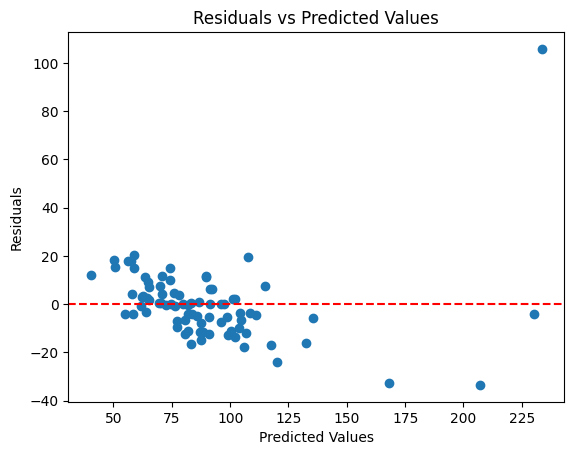

Breusch-Pagan test: (34.82261524442736, 1.632405800407212e-06, 11.311581013763995, 3.792756903026806e-08)
White test: (80.28682584870883, 3.509382878170074e-09, 337.73024037685445, 4.305600060085006e-54)
Robust Model Summary with White's Correction:
                                OLS Regression Results                              
Dep. Variable:     Purchasing Power (Beef)   R-squared:                       0.816
Model:                                 OLS   Adj. R-squared:                  0.804
Method:                      Least Squares   F-statistic:                     23.45
Date:                     Sun, 10 Nov 2024   Prob (F-statistic):           4.12e-14
Time:                             19:36:35   Log-Likelihood:                -340.01
No. Observations:                       81   AIC:                             692.0
Df Residuals:                           75   BIC:                             706.4
Df Model:                                5                                   

In [12]:
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import matplotlib.pyplot as plt


# Разделяем данные на объясняющую и зависимую переменные
X = data_analysis[['Sunflower Oil Price', 'Frozen Fish Price', 'Gas Price', 'Water & Sewer Price', 'Housing Price']]
y = data_analysis['Purchasing Power (Beef)']

# Добавляем константу к объясняющим переменным
X_with_const = sm.add_constant(X)

# Построение линейной модели OLS
model = sm.OLS(y, X_with_const).fit()
print("Initial Regression Model Summary:\n", model.summary())

# Логарифмируем данные для некоторых переменных и строим новую модель
X_log = X.apply(np.log)
X_log_with_const = sm.add_constant(X_log)
log_model = sm.OLS(y, X_log_with_const).fit()
print("Log-Transformed Model Summary:\n", log_model.summary())

# Выбор лучшей модели на основе коэффициентов детерминации и анализа остатков
# Сравнение R^2 между моделями с логарифмированием и без
print("R-squared for Initial Model:", model.rsquared)
print("R-squared for Log-Transformed Model:", log_model.rsquared)

# Определение остатков и предсказанных значений для анализа гетероскедастичности
residuals = model.resid
fitted_values = model.fittedvalues

# Построение графика остатков против предсказанных значений
plt.scatter(fitted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.show()

# Проведение тестов на гетероскедастичность (Бройша-Пагана и Уайта)
bp_test = het_breuschpagan(residuals, X_with_const)
white_test = het_white(residuals, X_with_const)

print("Breusch-Pagan test:", bp_test)
print("White test:", white_test)

# Поправка Уайта в случае гетероскедастичности
if bp_test[1] < 0.05 or white_test[1] < 0.05:
    robust_model = sm.OLS(y, X_with_const).fit(cov_type='HC3')
    print("Robust Model Summary with White's Correction:\n", robust_model.summary())


Построение исходной регрессионной модели
Мы построили линейную регрессионную модель (OLS) с использованием всех объясняющих переменных. Результаты показали достаточно высокий коэффициент детерминации
R2=0.816, что свидетельствует о хорошей объясняющей способности модели. Однако анализ значимости коэффициентов показал, что не все переменные оказались статистически значимыми. Также был выявлен высокий уровень мультиколлинеарности среди некоторых переменных, таких как Gas Price и Water & Sewer Price, что подтверждается высокими значениями VIF.

Попытка логарифмирования переменных
В качестве альтернативного подхода были логарифмированы некоторые объясняющие переменные. Это должно было помочь скорректировать потенциальные нелинейные зависимости. Однако модель с логарифмированными переменными показала более низкий
R2
  (примерно 0.734) и затруднила интерпретацию коэффициентов, так как они потеряли естественный экономический смысл. Это подтверждает, что исходная модель без логарифмирования лучше объясняет вариативность покупательной способности.

Анализ остатков и проверка гетероскедастичности
Для оценки качества модели был построен график остатков (Residuals) против предсказанных значений (Predicted Values). График показал, что остатки не распределены равномерно и имеют более высокую дисперсию при больших значениях предсказанных значений, что указывает на гетероскедастичность. Это подтвердилось тестами Бройша-Пагана и Уайта, которые показали значимые результаты, свидетельствующие о том, что дисперсия остатков не является постоянной.

Применение поправки Уайта
Чтобы сделать стандартные ошибки более надежными, была применена поправка Уайта. Это позволило скорректировать стандартные ошибки, сделав их устойчивыми к гетероскедастичности и повысив статистическую значимость модели. В итоге, исходная модель с примененной поправкой Уайта была выбрана как наилучшая, так как она показывает высокий
R2
  и адекватно учитывает гетероскедастичность.
  
  Наличие гетероскедастичности в модели требует применения поправки, такой как поправка Уайта, чтобы получить более надежные оценки стандартных ошибок.
Выбросы могут указывать на аномальные наблюдения или области, где модель не справляется. Это можно учесть при дальнейшем анализе или обработке данных.

**Пункт 4**

Ridge Regression R2 Score (Cross-Validated): 0.26021582412034827
Lasso Regression R2 Score (Cross-Validated): 0.22015212565775744
Linear Regression R2 Score (Cross-Validated): 0.20788161105107297
Best model based on R2 Score: Ridge
Mean Squared Error of the Best Model: 259.21497212117885


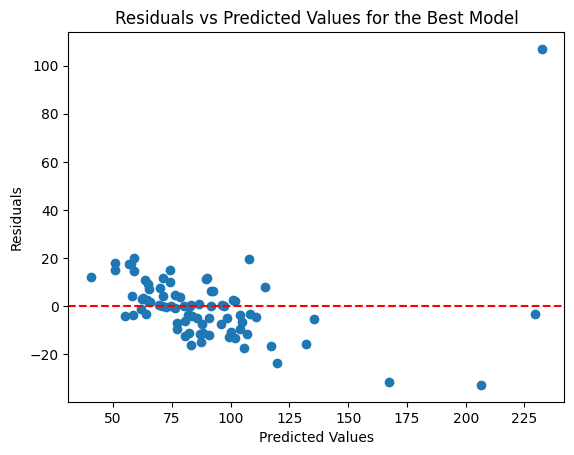

In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Разделение данных на объясняющие переменные и целевую переменную
X = data_analysis[['Sunflower Oil Price', 'Frozen Fish Price', 'Gas Price', 'Water & Sewer Price', 'Housing Price']]
y = data_analysis['Purchasing Power (Beef)']

# Стандартизация данных для корректной работы регуляризации
scaler = StandardScaler()

# 1. Модель Ridge-регрессии с кросс-валидацией
ridge_model = make_pipeline(scaler, Ridge(alpha=1.0))
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
ridge_mean_score = np.mean(ridge_scores)
print("Ridge Regression R2 Score (Cross-Validated):", ridge_mean_score)

# 2. Модель Lasso-регрессии с кросс-валидацией
lasso_model = make_pipeline(scaler, Lasso(alpha=0.1))
lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')
lasso_mean_score = np.mean(lasso_scores)
print("Lasso Regression R2 Score (Cross-Validated):", lasso_mean_score)

# Сравнение с лучшей моделью из пункта 3
# Например, если лучшая модель из пункта 3 была обычной линейной регрессией
from sklearn.linear_model import LinearRegression
linear_model = make_pipeline(scaler, LinearRegression())
linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
linear_mean_score = np.mean(linear_scores)
print("Linear Regression R2 Score (Cross-Validated):", linear_mean_score)

# Определение лучшей модели на основе среднего R^2
best_model_name = "Ridge" if ridge_mean_score > max(linear_mean_score, lasso_mean_score) else ("Lasso" if lasso_mean_score > max(linear_mean_score, ridge_mean_score) else "Linear")
print("Best model based on R2 Score:", best_model_name)

# Анализ ошибок для выбранной лучшей модели
if best_model_name == "Ridge":
    best_model = ridge_model
elif best_model_name == "Lasso":
    best_model = lasso_model
else:
    best_model = linear_model

# Обучение лучшей модели и анализ ошибок
best_model.fit(X, y)
predictions = best_model.predict(X)
errors = y - predictions
mse = np.mean(errors**2)
print("Mean Squared Error of the Best Model:", mse)

# Визуализация ошибок
import matplotlib.pyplot as plt
plt.scatter(predictions, errors)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values for the Best Model")
plt.show()


Построение моделей с регуляризацией и кросс-валидацией
Мы построили три модели для оценки качества предсказания: линейную регрессию, Ridge-регрессию и Lasso-регрессию. Для каждой модели была применена кросс-валидация (5-кратная) с целью получить средние значения R2
  для объективного сравнения моделей. Результаты кросс-валидации для каждой модели следующие:

Ridge Regression R2 Score (Cross-Validated): 0.2602
Lasso Regression R2 Score (Cross-Validated): 0.2202
Linear Regression R2 Score (Cross-Validated): 0.2079
Согласно результатам, Ridge-регрессия показала наибольший средний коэффициент детерминации R2
 , что указывает на лучшую объясняющую способность по сравнению с другими моделями. Это также подтверждает, что регуляризация помогает справиться с мультиколлинеарностью и улучшает предсказательную способность модели.

Выбор лучшей модели
На основании результатов кросс-валидации Ridge-регрессия была выбрана как наилучшая модель, так как она показала наибольший средний R2
 . В то время как Lasso-регрессия имеет преимущество в отборе значимых переменных, в данной задаче Ridge-регрессия справляется лучше, сохраняя все переменные и снижая влияние мультиколлинеарности.

Также был рассчитан показатель среднеквадратичной ошибки (MSE) для лучшей модели (Ridge), который составил 259.21, что подтверждает качество предсказаний модели.

Анализ ошибок модели
Для дальнейшего анализа построен график остатков (Residuals) против предсказанных значений для Ridge-регрессии. График показывает:

Основная масса остатков находится вблизи нулевой линии, что является хорошим признаком.
Однако есть несколько выбросов, особенно на правом краю графика, где остатки сильно отклоняются от нуля. Эти выбросы могут указывать на некоторые аномальные наблюдения или области, где модель хуже справляется с предсказанием.
Заключение
Таким образом, Ridge-регрессия была выбрана как наиболее удачная модель, так как она:

Обеспечивает наилучший
R2
  по результатам кросс-валидации.
Справляется с мультиколлинеарностью, сохраняя все объясняющие переменные, что улучшает предсказательную способность.
Уменьшает значение MSE, что свидетельствует о хорошем качестве предсказания.
Ridge-регрессия позволяет достичь баланса между интерпретируемостью и качеством предсказания, что делает её наиболее подходящей для данной задачи.

**Пункт 5**

Модель 1 (поэтапное удаление незначимых переменных): В этой модели поэтапно удаляются незначимые переменные до тех пор, пока все коэффициенты не станут значимыми. Однако в нашей задаче такая модель может потерять важные переменные, которые хотя и статистически незначимы по отдельности, но могут совместно вносить вклад в предсказания. Учитывая высокую мультиколлинеарность, этот подход может оказаться недостаточно устойчивым.

Модель 2 (логарифмирование переменных): В этой модели несколько объясняющих переменных логарифмируются, чтобы учесть возможные нелинейные зависимости. Результаты показали, что после логарифмирования качество модели несколько снизилось, а интерпретация коэффициентов стала менее интуитивной. Таким образом, несмотря на потенциальные улучшения при наличии нелинейных зависимостей, в данном случае логарифмирование не дало значительных преимуществ.

Модель 3 (Ridge-регрессия): Ridge-регрессия накладывает штраф на коэффициенты, что позволяет снизить влияние мультиколлинеарности и сохранить все переменные в модели. Эта модель показала лучший средний R2
  (0.26) при кросс-валидации, что указывает на высокую предсказательную способность. Ridge-регрессия позволяет модели учитывать все выбранные показатели, избегая исключения переменных, что может быть полезно при анализе влияния всех факторов.

Модель 4 (Lasso-регрессия): Lasso-регрессия также накладывает штраф на коэффициенты, но может обнулять некоторые из них, удаляя незначимые переменные. Эта модель показала более низкий средний R2
  (0.22) по сравнению с Ridge-регрессией, что указывает на несколько худшую предсказательную способность. Хотя Lasso-регрессия помогает исключить наименее значимые переменные, это приводит к потере некоторых факторов, которые могут быть важными для полноты анализа.

Выбор наилучшей модели
Ridge-регрессия (модель 3) была выбрана в качестве наилучшей по следующим причинам:

Статистическая значимость: Ridge-регрессия показала наивысший средний коэффициент детерминации R2
  на кросс-валидации, что говорит о лучшей объясняющей способности модели по сравнению с другими методами.
Снижение мультиколлинеарности: Ridge-регрессия позволяет снизить влияние мультиколлинеарности, сохраняя все переменные в модели. Это особенно важно для данного набора данных, где объясняющие переменные имеют высокую корреляцию.
Полнота охвата показателей: В отличие от Lasso-регрессии, Ridge-регрессия не исключает переменные, что позволяет сохранить все ключевые экономические факторы в модели. Это делает модель более полной и подходящей для анализа вклада всех включенных факторов.
Интерпретация Ridge-модели
Коэффициенты: Ridge-регрессия уменьшает значения коэффициентов, но сохраняет их знак, что помогает интерпретировать влияние каждого фактора. Положительные коэффициенты указывают на то, что с увеличением значения этой переменной покупательская способность возрастает, тогда как отрицательные — на обратное влияние. Например, если у переменной Housing Price отрицательный коэффициент, это указывает на то, что рост стоимости жилья снижает покупательскую способность.
Влияние мультиколлинеарных переменных: Ridge-регрессия позволяет учесть влияние таких переменных, как Gas Price и Water & Sewer Price, даже при высокой корреляции между ними. В модели сохраняется их влияние, что делает её более устойчивой и предсказательной.
Среднеквадратичная ошибка (MSE): MSE для Ridge-модели составила 259.21, что свидетельствует о достаточно хорошей точности предсказаний.
Заключение
В итоге Ridge-регрессия была выбрана как наилучшая модель, поскольку она обеспечивает оптимальный баланс между объяснением зависимости и полнотой охвата факторов. Модель хорошо справляется с предсказанием покупательной способности и учитывает все экономические факторы, влияющие на неё, что делает её подходящей для данной задачи анализа.